# Taller gradiente descendente

## Nombre Michelle Y Brayan

In [1]:
# dependecias para todo el taller. No se deben agregar más dependecias
import numpy as np
import math
from matplotlib import pyplot as plt

Carga de datos base:

In [2]:
tam = 300
x = np.linspace(0,5,tam)
t = np.sin(2*np.pi*x)+np.random.normal(0,0.4,tam)

1- Muestre la señal $t$ en un gráfico.

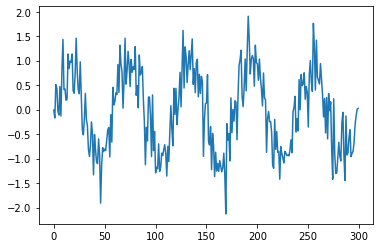

In [3]:
plt.plot(t)
plt.show()
plt.ion()

2- Usando mínimos cuadrados desarrolle para cada una de las tres de funciones base una solución que se ajuste a la señal mostrada en el punto anterior. Defina los valores de m y s en cada uno de los tres casos. Realice un gráfico comparativo para cada $\hat{t}$ vs t, y uno final de todas las $\hat{t}$s vs t. Muestré los errores de cada $\hat{t}$. Use subplot. ¿Que puede intepretar de los resultados? (1.2)

[[1.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.34448161e-003 1.11855572e-005 ... 1.34905726e-166
  4.51189718e-169 1.50899571e-171]
 [1.00000000e+000 6.68896321e-003 4.47422288e-005 ... 1.99085712e-146
  1.33167700e-148 8.90753847e-151]
 ...
 [1.00000000e+000 9.93311037e-001 9.86666816e-001 ... 6.37841080e-001
  6.33574585e-001 6.29336628e-001]
 [1.00000000e+000 9.96655518e-001 9.93322222e-001 ... 7.98950873e-001
  7.96278796e-001 7.93615656e-001]
 [1.00000000e+000 1.00000000e+000 1.00000000e+000 ... 1.00000000e+000
  1.00000000e+000 1.00000000e+000]]
[[1.00000000e+00 1.17271401e-01 1.89133498e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 2.81336515e-01 1.22012994e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.37181182e-01 6.26475962e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.26475962e

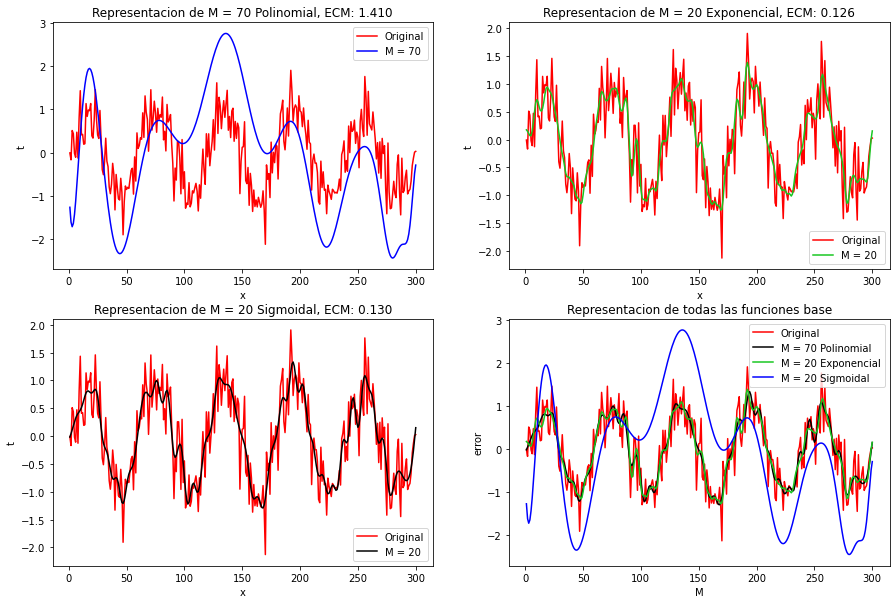

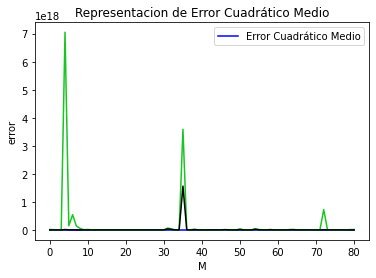

In [14]:
def generarPhi(x, m):
    s1 = 0.007
    s2 = 0.01
    val = np.arange(m)
    u=np.linspace(0,1,m)
    #phi = np.ones((len(x), len(val)))
    phi= np.arange(0,len(t),1)
    phi2= np.linspace(0,1,len(t))
    phiPolinomial = np.ones((len(x), len(val)),dtype=np.float64)
    phiExponencial = np.ones((len(x), len(val)),dtype=np.float64)
    phiSigmoidal = np.ones((len(x), len(val)),dtype=np.float64)
    for i in range(0, len(x), 1):
        for j in range(1, len(val), 1):
            phiPolinomial[i,j] = phi2[i]**val[j]
            phiExponencial[i, j] = math.exp(-(((phi2[i]-u[j])**2)/(2*s1**2)))
            a=(phi2[i]-u[j])/s2
            phiSigmoidal[i, j] = 1/(1+math.exp(-a))
     
    return phiPolinomial,phiExponencial,phiSigmoidal

def CalcularW(phi):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.linalg.inv(phi.T@phi)@phi.T@t1

def errorCuadraticoMedio(phi,w):
    t0=np.array(t)
    t1=t0.reshape(len(t0),1)
    return np.mean(((phi@w)-t1)**2)

#Valores de M

m1=70
m2=20
m3=20

#Graficación------------------------------------------------

names=np.array(['M = '+str(m1),'M = '+str(m2),'M = '+str(m3)])
plt.ion()

#Calcular Predicción
phiPoli, phiExpo, phiSigmo = generarPhi(x, m1)

print(phiPoli)
print(phiExpo)
print(phiSigmo)

wPoli = CalcularW(phiPoli)
wExpo = CalcularW(phiExpo)
wSigmo = CalcularW(phiSigmo)


tpPoli=phiPoli@wPoli
tpExpo=phiExpo@wExpo
tpSigmo=phiSigmo@wSigmo



t0=np.arange(1,len(t)+1,1)
t1=t0.reshape(len(t0),1)

plt.subplots(2,2,figsize=(15,10))


plt.subplot(2,2,1)
plt.plot(t1,t,'r',t1,tpPoli,'b')
plt.legend(['Original',names[0]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[0]+" Polinomial, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiPoli,wPoli)))

plt.subplot(2,2,2)
plt.plot(t1,t,'r',t1,tpExpo,'#17C620')
plt.legend(['Original',names[1]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[1]+" Exponencial, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiExpo,wExpo)))


plt.subplot(2,2,3)
plt.plot(t1,t,'r',t1,tpSigmo,'k')
plt.legend(['Original',names[2]])
plt.xlabel("x")
plt.ylabel("t")
plt.title("Representacion de "+names[2]+" Sigmoidal, ECM: "+"{:.3f}".format(errorCuadraticoMedio(phiSigmo,wSigmo)))


plt.subplot(2,2,4)
plt.plot(t1,t,'r',t1,tpSigmo,'k',t1,tpExpo,'#17C620',t1,tpPoli,'b')
plt.legend(['Original',names[0]+" Polinomial",names[1]+" Exponencial",names[2]+" Sigmoidal"])
plt.xlabel("M")
plt.ylabel("error")
plt.title("Representacion de todas las funciones base")

plt.show()

me1=0
me3=80
errorR=np.arange(me1,me3+1)
errorM=np.full(me3+1-me1,1,dtype=np.float64)
errorM1=np.full(me3+1-me1,1,dtype=np.float64)
errorM2=np.full(me3+1-me1,1,dtype=np.float64)
for i in range(me1,me3+1):
    phin,phinE,phinS = generarPhi(x,i)
    wn = CalcularW(phin)
    errorM[i-m1]= errorCuadraticoMedio(phin,wn)
    errorM1[i-m1]= errorCuadraticoMedio(phinE,wn)
    errorM2[i-m1]= errorCuadraticoMedio(phinS,wn)
plt.plot(errorR,errorM,'b',errorR,errorM1,'#17C620',errorR,errorM2,'k')
plt.legend(['Error Cuadrático Medio'])
plt.xlabel("M")
plt.ylabel("error")
plt.title("Representacion de Error Cuadrático Medio")
plt.show()

3- Ahora programe una función para generar $w$ y $\hat{t}$ usando el algoritmo de gradiente descendente. Defina el caso de parada usando un error esperado y cantidad máxima de iteraciones (debe manejar ambos casos). Recuerde que la ecuación para calcular $w$ esta dada por:

$w_{j} = w_{j} - \alpha \Delta$

Retorne $w$, $\hat{t}$, el número de iteraciones y el error obtenido. (1.2). Una solución ideal no debe usar todas las iteraciones.

In [5]:
def calcularWGradiente(w,phi, errEsperado, aprendizaje):
    t1=np.array(t)
    tP=phi@w
    print(phi.shape)
    errActual=errorCuadraticoMedio(phi,w)    
    i=0
    while errEsperado<errActual and  i<100:
        for j in range(m):
            w[j]=w[j]-aprendizaje*calcularDelta(tP[:,0],t1,phi[:,j])        
        tP=phi@w
        errActual=errorCuadraticoMedio(phi,w)
        print(errActual)
        i+=1   
    return i,w

    
def calcularDelta(tP,t1,phi):
    return np.mean((tP-t1)*phi)

4- Usando las tres funciones base con los mismos $m$ obtenidos en el punto $2$, calcule $\hat{t}$ usando gradiente descendente y responda. 

¿Cuantas iteraciones tomó para el calculo de $w$?. 
¿Qué tan cerca quedo del $w$ generado con mínimos cuadrados?

Grafique los resultados obtenido realizando la comparación de t y $\hat{t}$. Muestre el número de interaciones, M y el error. (1.2)

5- Ahora haga el mismo ejercicio del punto 4 pero con $\phi$ normalizada. Compare las iteraciones, el error y $w$. Que puede intepretar de los resultados. (1.4)